# Computational Social Science Project #2 

*Group number: 1

*Group members:   Corrine Aramburo, MinJee Keh, and Nehal Eldeeb 

*Semester:* Fall 2021


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send KQ a pull request on GitHub flagging the syntax that's tripping you up 

# 1. Introduction/Setup

#### a) Import relevant libraries
Add the other libraries you need for your code below and/or as you go. 

In [1]:
# import libraries you might need here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.graphics.api as smg
import seaborn as sns
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

sns.set_style("darkgrid")

# use random seed for consistent results 
np.random.seed(273)


#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. 

In [2]:
diabetes = pd.read_csv("Diabetes with Population Info by County 2017.csv")
                       #CountyFips needs to be a string so leading 0 isn't dropped (this is only if you want to make choropleth map): 
dtype={"CountyFIPS": str}


In [3]:
# look at the dimensions of the diabetes data frame
#Checking what's in the data- tables are helpful
print('shape: ', diabetes.shape) 
diabetes.head()


shape:  (3220, 95)


,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [4]:
## for columns can do display.max_columns
pd.set_option('display.max_rows', 100) # tells pandas how many rows to display when printing so results don't get truncated

# look at the data types for each column in diabetes df 
print('data types:', diabetes.dtypes)


data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                                int64
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [5]:
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes["Diabetes_Number"].str.isnumeric()]["Diabetes_Number"].unique()) 


['Suppressed']


In [6]:
# Now do the same as above, but for "Obesity_Number" :
print(diabetes[~diabetes["Obesity_Number"].str.isnumeric()]["Obesity_Number"].unique()) 


['No Data']


The values contained in the two columns above making them objects (rather than integers) appear to be strings like "No Data" and "Suppressed." Let's drop those rows in the next section, and also recode Physical_Inactivity_Number to be an integer. 

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' to. 

In [7]:
# Diabetes
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"]  # note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype(int) 

# Obesity
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"]
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype(int) 


# Physical Inactivity
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!="No Data"]
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype(int) 


# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]
# change to numeric (specifically, integer or float?) from string (because originally included the "-" )
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype(float)

diabetes.head(5) #looking at data

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [8]:
# select count variables to rc to percentages; make sure we leave out ratios and our population variable b/c these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 'sex and age_total population_sex ratio (males per 100 females)', 'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
#print(rc_cols) - look at cols leftover
           
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') # recode all selected columns to numeric

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)


Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [9]:
pd.set_option('display.max_columns', None)
# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) 
    # select which columns in the summary table we want to present


,count,mean,min,max
CountyFIPS,3112.0,30374.235219,1001.000000,5.604500e+04
Diabetes_Number,3112.0,0.092857,0.019038,2.242079e-01
Obesity_Number,3112.0,0.251666,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,0.200861,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,34.700000,2.200000e+02
race_total population,3112.0,103682.624036,228.000000,1.009805e+07
race_total population_one race,3112.0,0.976059,0.713126,1.000000e+00
race_total population_two or more races,3112.0,0.023941,0.000000,2.868743e-01
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000e+00
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000e+00


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. 

In [10]:
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames


Duplicate Columns are as follows: 


['race_total population_one race_1',
 'sex and age_total population_65 years and over_1',
 'race_total population_two or more races_1',
 'hispanic or latino and race_total population',
 'sex and age_total population_18 years and over_1',
 'sex and age_total population']

In [11]:
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns= duplicateColumnNames)


# 2. Exploratory Data Analysis

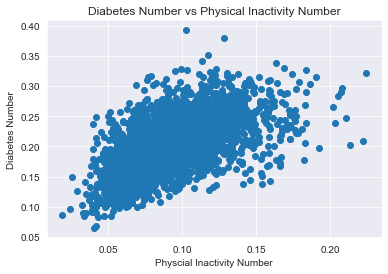

In [12]:
#EDA Graph 1

plt.scatter(diabetes['Diabetes_Number'], diabetes["Physical_Inactivity_Number"])
plt.title("Diabetes Number vs Physical Inactivity Number")
plt.xlabel("Physcial Inactivity Number")
plt.ylabel("Diabetes Number")
plt.show()


EDA Graph 1: There appears to be a linear relationship and positive association between diabetes number and physical inactivity. With less physical activity the diabetes number goes up. This makes logical sense since physical inactivity, possibly leading to obesity, has been linked to diabetes. There are a few outliers (those who have limited physical activity and a relatively low diabetes number). 


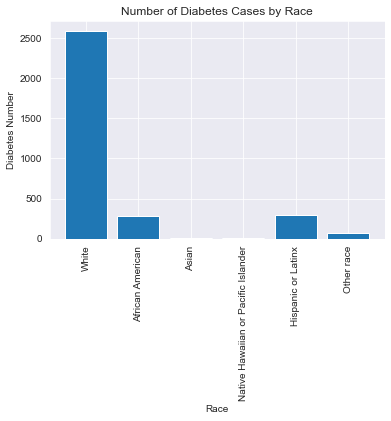

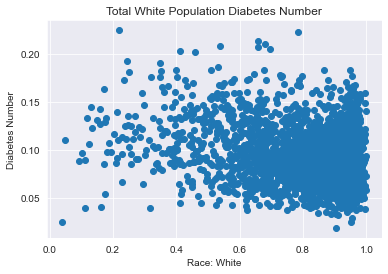

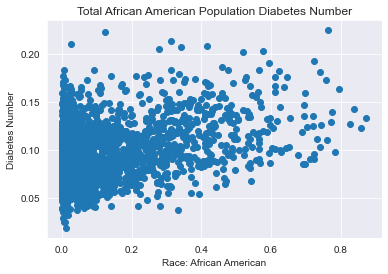

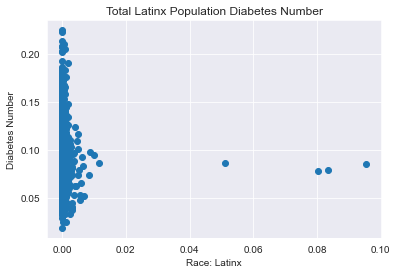

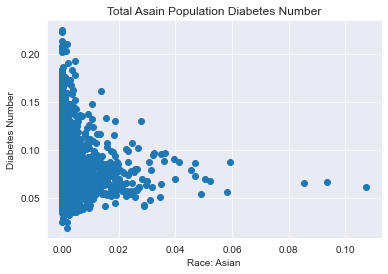

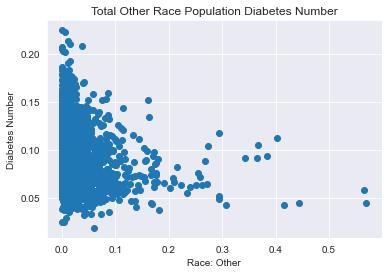

In [13]:
#EDA Graph 2
#For EDA Graph 2
wr = sum(diabetes["race_total population_one race_white"])
br = sum(diabetes["race_total population_one race_black or african american"])
ar = sum(diabetes["race_total population_one race_asian_other asian"])
pir = sum(diabetes["race_total population_one race_native hawaiian and other pacific islander_native hawaiian"])
hr = sum(diabetes["hispanic or latino and race_total population_hispanic or latino (of any race)"])
other = sum(diabetes["race_total population_one race_some other race"])

races = pd.DataFrame({"Races": ["White", "African American", "Asian", "Native Hawaiian or Pacific Islander", 
                     "Hispanic or Latinx", "Other race"], 
                     'Count': [wr, br, ar, pir, hr, other]},)
x_axis = races["Races"]
y_axis = races["Count"]

plt.bar(x_axis,y_axis)             
plt.title("Number of Diabetes Cases by Race")
plt.xticks(x_axis, rotation = 90)
plt.xlabel("Race")
plt.ylabel("Diabetes Number")
plt.show()
plt.scatter(diabetes['race_total population_one race_white'], diabetes["Diabetes_Number"])
plt.title("Total White Population Diabetes Number")
plt.xlabel("Race: White")
plt.ylabel("Diabetes Number")
plt.show()

plt.scatter(diabetes["race_total population_one race_black or african american"], diabetes["Diabetes_Number"])
plt.title("Total African American Population Diabetes Number")
plt.xlabel("Race: African American")
plt.ylabel("Diabetes Number")
plt.show()

plt.scatter(diabetes['race_total population_one race_native hawaiian and other pacific islander_native hawaiian'], 
            diabetes["Diabetes_Number"])
plt.title("Total Latinx Population Diabetes Number")
plt.xlabel("Race: Latinx")
plt.ylabel("Diabetes Number")
plt.show()

plt.scatter(diabetes["race_total population_one race_asian_other asian"], diabetes["Diabetes_Number"])
plt.title("Total Asain Population Diabetes Number")
plt.xlabel("Race: Asian")
plt.ylabel("Diabetes Number")
plt.show()

plt.scatter(diabetes["race_total population_one race_some other race"], diabetes["Diabetes_Number"])
plt.title("Total Other Race Population Diabetes Number")
plt.xlabel("Race: Other")
plt.ylabel("Diabetes Number")
plt.show()

EDA Graph 2: There does not seem to be a clear association between any of the races listed (White, African American, Latinx, Asian, Native Hawaiian/Pacific Islander, Other) and diabetes number. However, there is a slight negative relationship for being White with diabetes number and a slight positive relationship between being African American and diabetes number. Overall, the sample has a large proportion of White participants compared to other races, therefore, it is likely that if the sample sizes were more equal across racial groups, a clearer pattern could be identified.

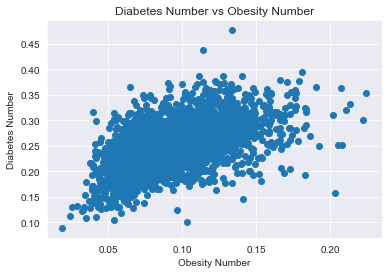

In [14]:
#EDA Graph 3
plt.scatter(diabetes['Diabetes_Number'], diabetes["Obesity_Number"])
plt.title("Diabetes Number vs Obesity Number")
plt.xlabel("Obesity Number")
plt.ylabel("Diabetes Number")
plt.show()


EDA Graph 3: Much like scatter plot for the first exploratory data analysis, there appears to be a positive, linear association between obestiy number and diabetes number. As the obesity number increases so does the diabetes number. This makes logical sense since obesity has been linked to diabetes. 


# 3. Prepare to Fit Models

## 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'State' to be a categorical variable using `pd.get_dummies` and drop 'County' using `.drop()` because 'CountyFIPS' is already a unique identifier for the county. 

In [15]:
# create dummy features out of 'State' , which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ["State"],  
                               drop_first = True) # only create 49 dummies by dropping first in category

# drop 'County' variable
diabetes_clean = diabetes_clean.drop(labels = ['County'],
                               axis = 1) # axis tells python we want to drop columns rather than index rows

# look at first 10 rows of new data frame 
diabetes_clean.head(10) 

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

## 3.2/3.3 Partition Data and Feature Selection

Now, we will partition our data to prepare it for the training process. We will use 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

In [16]:
from sklearn.model_selection import train_test_split

# Set y 
y = diabetes_clean['Diabetes_Number']

# X (everything except diabetes, our target)
# create X by dropping our y variable from the df with the .drop() method.
X = diabetes_clean.drop(["Diabetes_Number"], axis = 1) # refers to columns
X = pd.get_dummies(X)
X.head()

,CountyFIPS,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race - and three or mo

We should also preprocess our data. Using the `preprocessing` module from sklearn, let's scale our features so that they are mean-centered.

In [17]:
from sklearn import preprocessing

X = preprocessing.scale(X)

We can also get rid of the 0 variance features using the `VarianceThreshold()` method from `feature_selection`. 

In [18]:
from sklearn import feature_selection

selector = feature_selection.VarianceThreshold(0)
X = selector.fit_transform(X)

Investigate whether there are any features that you should remove prior to model fitting. You may also consider using plots and relationships you found in the EDA stage for this question: 

According to the Variance Threshold documentation (2021), the variance threshold removes all the features that doesn't meet a set threshold. The default removes all zero-variance features, which is the case with the above code. Therefore, all the features that have the same value in the dataset were removed.

And finally, let's split our data:

In [19]:
# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_validate is", X_validate.shape)
print("Shape of y_validate is", y_validate.shape)

Shape of X train is (2489, 135)
Shape of y_train is (2489,)
Shape of X_test is (623, 135)
Shape of y_test is (623,)
Shape of X train is (1866, 135)
Shape of y_train is (1866,)
Shape of X_validate is (623, 135)
Shape of y_validate is (623,)


Explain your choice of how much data to include in each set, and the tradeoffs involved with differing sizes in each set. Also describe the purpose of each set:

For the purposes of this project, we followed the convention of the 60-20-20 split for the train, validation, test sets. We decided upon the typical 60-20-20 split because of the number of observations in the data (n = 3112), given that the size of the dataset it relatively large, 60-20-20 seemed like the ideal choice. The trade-off of using differing sizes in the each set is the issue of variance. Meaning that with less data in the training set there can be greater variance among the estimates and with less data in the testing set there may be greater variance in the performance statistic. The training set: For the training, we randomly assigned 60% of the observations to train our models. We use the training set to iterate the model and use it to learn more about our models The validation set: For the validation set, we randomly assigned 20% of the observations to see how will the models did (i.e., how good was our fit). We then use hyperparameters to tune the model and identify under or overfitting of the model. The test set: For the test, we randomly assigned 20% of the observations to this set. The test set is used to evaluate the final model and determine if it worked. 


# 4. Train Models

##  4.1 Model Description

Choose 3 different machine learning techniques. Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.
- Ordinary Least Squares regression identifies a best fit model that minimizes the residual sums of squares
- Ridge regression is similar to Ordinary Least Squares regression except it regularizes the model using a penalty term, lambda, that constrains feature coefficients.
- LASSO is like Ridge regression in that it also regularizes the model using a lambda as a penalty term to constrain coefficients. However, in Ridge equations, the terms are squared to account for negative values leading to larger penalties, whereas LASSO equations take the absolute value to account for negative values leading to smaller penalties. In addition, LASSO is more likely to shrink coefficients down to zero than Ridge.

All three models are plausible for this problem because our label or outcome variable of interest, diabetes number, is a continuous variable and there is a linear relationship. 

Pros/cons
- The advantage of using Ridge or LASSO regression is that they reduce overfitting by regularizing or penalizing the model. However, the disadvantage is that Ridge and LASSO can be computationally expensive to run. 
- Although OLS is less computationally expensive, it does not penalize the model for its choice of weights and can place a larger weight to one feature which can lead to overfitting. 



## 4.1.1 OLS Regression

In [20]:
# create a model
lin_reg = LinearRegression(normalize=True)

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

In [21]:
print(lin_model.coef_)
print(lin_model.intercept_)

[ 1.81141509e-01  7.16741091e-03  7.12577033e-03  1.33564928e-04
  2.82047858e-05 -3.00206803e+10 -3.16455255e+10 -1.40466842e+10
 -1.20975791e+10 -6.41701948e+09  9.20039398e-04 -2.74186964e-04
  6.43244391e-04  4.71207551e-04 -1.23735939e+10  2.68397098e+09
  2.73834177e+09  4.24301881e+09  1.34639204e+09  9.74502447e+08
  1.14709093e+09  2.16644157e+09  9.59022337e+10 -6.69605311e+10
 -1.17976645e+10 -1.70133125e+10 -3.09459166e+10 -3.26402408e+09
 -4.02559731e-03 -1.20717776e-02 -7.99733904e-03  1.89101077e-03
  5.49083749e-02 -1.79150337e-01 -9.43492655e-02 -1.78948362e-02
 -1.96824538e-02 -5.39687044e-02 -5.40161368e+10  6.09188642e+10
  6.72566741e+09  3.95185101e+09  1.82632896e+10  2.55758700e+10
 -1.64907069e+10 -1.17651544e+10 -6.13793080e+09 -2.25364386e+09
 -3.15862112e+08 -1.88277858e+08 -1.85775120e+10  8.94032186e+08
  1.71097113e+10 -6.96399743e-05  1.39901631e+09 -9.52921574e+08
 -8.53599494e+08  2.50639621e+11  2.50639621e+11 -2.19000547e-02
  5.30509354e+09  5.30686

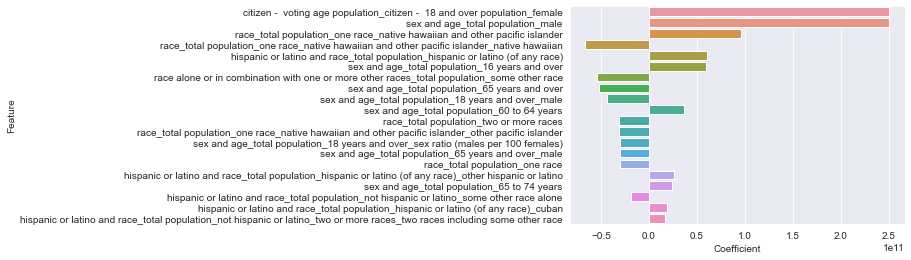

In [22]:
# Create a dataframe with the coefficient and feature names
lin_reg_data = pd.DataFrame([lin_model.coef_,
                               diabetes_clean.drop(columns = ['Diabetes_Number']).columns]).T
lin_reg_data.columns = ["Coefficient", 'Feature']

# Plot
lin_reg_data.replace(to_replace=[None], value= 0, inplace=True)
lin_reg_data['Coefficient'] = lin_reg_data['Coefficient'].astype(float)
lin_reg_data['Coefficient_Abs'] = abs(lin_reg_data['Coefficient'])
ax = sns.barplot(x="Coefficient", y="Feature", data=lin_reg_data.nlargest(20, "Coefficient_Abs"))
plt.show()

## 4.1.2 Ridge Regression 

In [23]:
# make and fit a Ridge regression model
ridge_reg = Ridge() 
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_reg_data = pd.DataFrame([ridge_model.coef_,
                               diabetes_clean.drop(columns = ['Diabetes_Number']).columns]).T
ridge_reg_data.columns = ['Coefficient', 'Feature'] # name columns of ridge_reg_data 
ridge_reg_data.replace(to_replace=[None], value= 0, inplace=True)
ridge_reg_data['Coefficient_Abs'] = abs(ridge_reg_data['Coefficient'])
ridge_reg_data['Coefficient'] = ridge_reg_data['Coefficient'].astype(float)

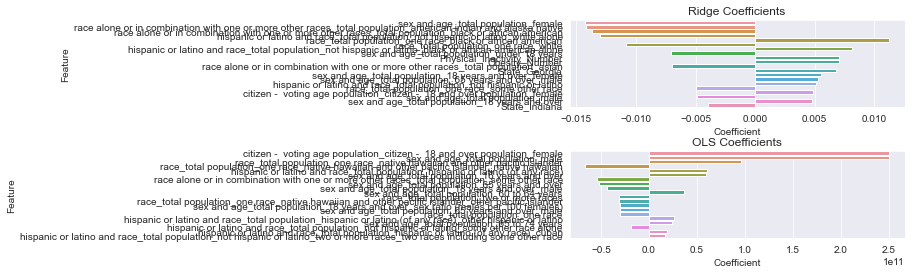

In [24]:
# plot the coefficients for the Ridge model and compare to OLS
figure = plt.figure()
figure.subplots_adjust(wspace = .5, hspace= .5)
figure.add_subplot(2, 1, 1)
Ridge_graph = sns.barplot(x="Coefficient", y="Feature", data=ridge_reg_data.nlargest(20, 'Coefficient_Abs'))
Ridge_graph.set_title("Ridge Coefficients")
figure.add_subplot(2, 1, 2)
OLS_Coeff_graph = sns.barplot(x="Coefficient", y="Feature", data=lin_reg_data.nlargest(20, "Coefficient_Abs"))
OLS_Coeff_graph.set_title("OLS Coefficients")
plt.show()

## 4.1.3 Lasso Regression

In [25]:
#create and fit the model
lasso_reg = Lasso(max_iter=10000, alpha = .001)
lasso_model = lasso_reg.fit(X_train, y_train)
lasso_reg_data = pd.DataFrame([lasso_model.coef_,
                               diabetes_clean.drop(columns = ['Diabetes_Number']).columns]).T
lasso_reg_data.columns = ['Coefficient', 'Feature']
lasso_reg_data.replace(to_replace = [None], value = 0, inplace= True) 
lasso_reg_data['Coefficient_Abs'] = abs(lasso_reg_data['Coefficient'])
lasso_reg_data['Coefficient'] = lasso_reg_data['Coefficient'].astype(float)

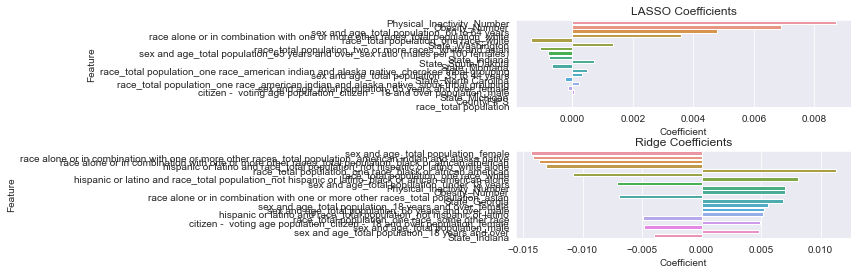

In [26]:
# plot coefficients for Ridge and LASSO
figure = plt.figure()
figure.subplots_adjust(wspace = .5, hspace=.5)
figure.add_subplot(2, 1, 1)
Lasso_graph = sns.barplot(x="Coefficient", y="Feature", data=lasso_reg_data.nlargest(20, "Coefficient_Abs"))
Lasso_graph.set_title("LASSO Coefficients")

figure.add_subplot(2, 1, 2)
Ridge_graph = sns.barplot(x="Coefficient", y="Feature", data=ridge_reg_data.nlargest(20, 'Coefficient_Abs'))
Ridge_graph.set_title("Ridge Coefficients")
plt.show()

## 4.2 Train Models (Hypertuning)

## 4.2.1 OLS Regression Hypertuning

In [27]:
#calculate mean squared error of predicted values
def rmse(pred, actual):
    return np.sqrt(np.mean((actual-pred) ** 2))

In [28]:
#Linear OLS regression
param_grid = {'fit_intercept': ['True', 'False'],
              'normalize': ['True', 'False']}

# Grid search - to help decide what hyperparameters we should use
lin_grid_reg = GridSearchCV(lin_reg, param_grid, cv=3)

# Fit model on training data
lin_grid_reg.fit(X_train, y_train)

# Get best model by mean test score
best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])

# Get best predictions by predicting on validation set
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_validate)

# Print the best parameters, CV r2, validation r2, and validation RMSE
print(lin_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lin_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lin_pred, y_validate))


{'fit_intercept': 'True', 'normalize': 'True'}
Best CV R^2: -4.503483324435879e+55
Validation R^2: 0.4472570461756772
Validation RMSE 0.020638313333928057


## 4.2.2 Ridge Regression Hypertuning (After Hypertuning- Ridge is the Best Model)

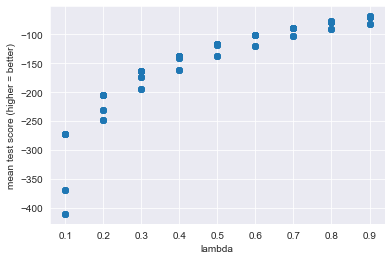

{'alpha': 0.9, 'fit_intercept': 'True', 'normalize': 'True', 'solver': 'svd'}
Best CV R^2: -68.56205979434951
Validation R^2: 0.4981714376554003
Validation RMSE 0.0196648338911471


In [29]:
#Ridge
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

# Grid search
ridge_grid_reg = GridSearchCV(ridge_reg, param_grid, cv=3)
# Fit model on training data
ridge_grid_reg.fit(X_train, y_train)
# Fit model on training data

# Get best model by mean test score
best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])
# Get best predictions by predicting on validation set
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)

#Plot 
plt.scatter(ridge_grid_reg.cv_results_['param_alpha'], ridge_grid_reg.cv_results_["mean_test_score"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

# Print the best parameters, CV r2, validation r2, and validation RMSE
print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

## 4.2.3 LASSO Regression Hypertuning

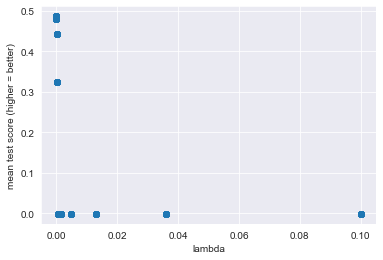

{'alpha': 1e-05, 'fit_intercept': 'True', 'normalize': 'True', 'selection': 'random'}
Best CV R^2: 0.486470981648337
Validation R^2: 0.5230761824744603
Validation RMSE 0.019170661549709613


In [46]:
#LASSO regression 

param_grid = {'alpha': np.logspace(-5, -1, 10), #why are we not running at .0001? Where did these numbers come from? 
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic', 'random']}
# Grid search
lasso_grid_reg = GridSearchCV(lasso_reg, param_grid, cv=3)

# Fit model on training data
lasso_grid_reg.fit(X_train, y_train)

# Get best model by mean test score
best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])

# Get best predictions by predicting on validation set
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)

plt.scatter(lasso_grid_reg.cv_results_['param_alpha'], lasso_grid_reg.cv_results_["mean_test_score"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

# Print the best parameters, CV r2, validation r2, and validation RMSE
print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

In [44]:
#LASSO regression 

#param_grid = {'alpha': np.arange(.001, 1, .1),
             #'fit_intercept': ['True', 'False'],
             #'selection': ['cyclic', 'random']}
# Grid search
#lasso_grid_reg = GridSearchCV(lasso_reg, param_grid, cv=3)

# Fit model on training data
#lasso_grid_reg.fit(X_train, y_train)

# Get best model by mean test score
#best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])

# Get best predictions by predicting on validation set
#best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)

#plt.scatter(lasso_grid_reg.cv_results_['param_alpha'], lasso_grid_reg.cv_results_["mean_test_score"])
#plt.xlabel('lambda')
#plt.ylabel('mean test score (higher = better)')
#plt.show()

# Print the best parameters, CV r2, validation r2, and validation RMSE
#print(lasso_grid_reg.cv_results_["params"][best_index])
#print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
#print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
#print('Validation RMSE', rmse(best_lasso_pred, y_validate))

## Our RMSEs for our three models in the training data "before hypertuning" (See 5.1) are:
1. OLS = 0.020342191165860012
2. Ridge = 0.019813579023018554
3. LASSO = 0.019581019099599892

## MJ -Where are these numbers from? they do not match the ones in 5.1
I think it is : 
- The RMSE for the OLS model, before hypertuning, is 0.020638326753823443 
- The RMSE for the Ridge model, before hypertuning, is 0.019813579023018484 
- The RMSE for the LASSO model, before hypertuning, is 0.019581019099599892 **SMALLEST



The LASSO model fit the validation data the best as it has the smallest RMSE and therefore is predicting the most accurately. The Ridge model also fit the data well but had a slightly larger RMSE than Ridge. Finally, the OLS RMSE was the largest out of the three models and thus fit the data the worst. 


# 5. Validate and Refine Models


## 5.1.1 OLS Predict on Validation Set(before hypertuning)

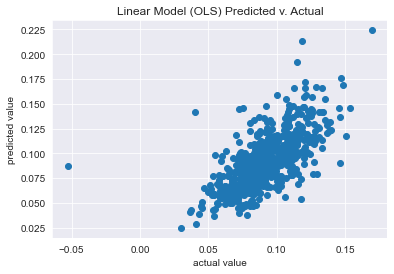

The RMSE for the OLS model, before hypertuning, is 0.020638313333928057 .


In [47]:
# predict the diabetes number using OLS parameters
lin_pred = lin_model.predict(X_validate)

# plot the residuals on a scatter plot
##plot predicted vs. actual value
plt.scatter(lin_pred, y_validate)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()


# calculate the rmse for the Ridge model
rmse(lin_pred, y_validate)
lin_rmse = rmse(lin_pred, y_validate)
print("The RMSE for the OLS model, before hypertuning, is", lin_rmse, ".")

## 5.1.2 Ridge Predict on Validation Set(before hypertuning)

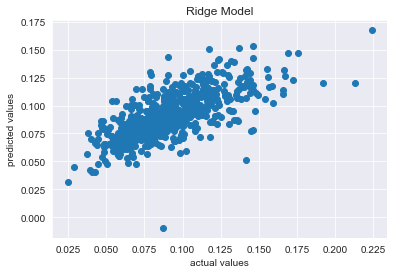

The RMSE for the Ridge model, before hypertuning, is 0.019813579023018484 .


In [48]:
# use the model to make predictions
ridge_pred = ridge_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

# calculate the rmse for the Ridge model
rmse(ridge_pred, y_validate)
ridge_rmse = rmse(ridge_pred, y_validate)
print("The RMSE for the Ridge model, before hypertuning, is", ridge_rmse, ".")

## 5.1.3 Lasso Predict on Validation Set(before hypertuning)

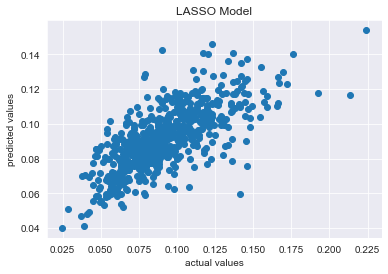

The RMSE for the LASSO model, before hypertuning, is 0.019581019099599892 .


In [49]:
# use the model to make predictions
lasso_pred = lasso_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

# calculate the rmse for the LASSO model
lasso_rmse = rmse(lasso_pred, y_validate)
print("The RMSE for the LASSO model, before hypertuning, is", lasso_rmse,".")

## 5.1.4 Lasso Predict on Validation Set(after hypertuning) - Our best model

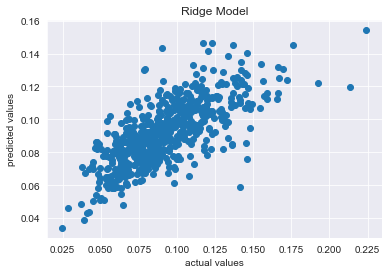

The RMSE for the LASSO model, after hypertuning, is 0.019170661549709613 .LASSO is our best model after hypertuning.


In [50]:
# use the model to make predictions
lasso_pred = lasso_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, best_lasso_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

# calculate the rmse for the Lasso model
rmse(lasso_pred, y_validate)
lasso_rmse = rmse(best_lasso_pred, y_validate)
print("The RMSE for the LASSO model, after hypertuning, is", lasso_rmse,"." 
       "LASSO is our best model after hypertuning.")

Our RMSEs for our three models on the validation set "after hypertuning" (See 4.2) are:
1. OLS = 0.020638326753823443 (same as before hypertuning)
2. Ridge = 0.0196648338911471
3. LASSO = 0.019170716514491308 **SMALLEST

The best model fit after hypertuning is the LASSO model as it has the smallest RMSE and therefore is predicting the most accurately. The OLS model RMSE stayed the same before and after hypertuning and is not the best fit. 

## 5.2 Feature Selection 

Our best model, LASSO performs automatic feature selection by allowing coefficients to shrink to 0. 


##DELETE THIS CELL## IF OUR BEEST MODEL WAS RIDGE, NOT LASSO, WE CAN USE THE CODE BELOW(1)-feature selection
from sklearn.metrics import r2_score

##To fix the numpy error, I changed it to pd dataframe by using the code:


#identify coeffs not adding to the model
X_train = pd.DataFrame(X_train)
X_validate = pd.DataFrame(X_validate)
X_test = pd.DataFrame(X_test)


##our coefficient cutoff = 0.005
X_train.columns[np.logical_and(abs(ridge_model.coef_) > 0.005, abs(ridge_model.coef_) < 100)]
#drop the coeffs from the train, validate, test set
X2_train = X_train.drop(X_train.columns[np.logical_and(abs(ridge_model.coef_)> 0.005, abs(ridge_model.coef_) < 100)], 1)
X2_validate = X_validate.drop(X_train.columns[np.logical_and(abs(ridge_model.coef_)> 0.005, abs(ridge_model.coef_) < 100)], 1)
X2_test = X_test.drop(X_train.columns[np.logical_and(abs(ridge_model.coef_)> 0.005, abs(ridge_model.coef_) < 100)], 1)

##DELETE THIS CELL## IF OUR BEEST MODEL WAS RIDGE, NOT LASSO, WE CAN USE THE CODE BELOW(2)-retraining
ridge_reg_fs = Ridge() 
ridge_model_fs = ridge_reg_fs.fit(X2_train, y_train)

##DELETE THIS CELL## IF OUR BEEST MODEL WAS RIDGE, NOT LASSO, WE CAN USE THE CODE BELOW(3)-hypertuning on the reduced train data
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

#Grid search
ridge_grid_reg_fs = GridSearchCV(ridge_reg_fs, param_grid, cv=3)
#Fit model on training data
ridge_grid_reg_fs.fit(X2_train, y_train)
#Fit model on training data

#Get best model by mean test score
best_index = np.argmax(ridge_grid_reg_fs.cv_results_["mean_test_score"])

#Get best predictions by predicting on validation set
best_ridge_pred_fs = ridge_grid_reg_fs.best_estimator_.predict(X2_validate)

#Plot 
plt.scatter(ridge_grid_reg_fs.cv_results_['param_alpha'], ridge_grid_reg_fs.cv_results_["mean_test_score"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

#Print the best parameters, CV r2, validation r2, and validation RMSE
print(ridge_grid_reg_fs.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg_fs.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg_fs.score(X2_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred_fs, y_validate))

##DELETE THIS CELL## IF OUR BEEST MODEL WAS RIDGE, NOT LASSO, WE CAN USE THE CODE BELOW(4)-COMPARE RMSE AND CHOOSE THE BEST MODEL
RMSE(RIDGE/ hypertuning/ reduced model): 0.02179216700714394 vs RMSE(RIDGE/hypertuning/ full model): 0.0196648338911471
##BASED, ON THE RESULTS, RMSE(RIDGE/ hypertuning/ reduced model) IS OUR BEST MODEL.


## 5.3 Test Set

The advantage of using both validation and test sets in the social sciences and public policy is the ability to modify the model to ensure that the model is not overfitting the training data. We can make adjustments after running the model on the validation set, and then predict the outcome of interest using the test set.

In [63]:
# make predictions for the test set using our best model, LASSO

best_pred = lasso_grid_reg.best_estimator_.predict(X_test)
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Test R^2:', lasso_grid_reg.score(X_test, y_test))
print('Test RMSE', rmse(best_pred, y_test))


Best CV R^2: 0.4864779679974343
Test R^2: 0.4866241871509741
Test RMSE 0.019946634865556524


##MJ Using the LASSO model, the RMSE for the validation set is  0.019170716514491308 and that for test set is 0.019946634865556524. 


## 5.4 Cross-Validation Approach

### 5.4.1. Using your preferred model, use a k-fold cross-validation approach to refit the model.



In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score


clf = Lasso(alpha =  1e-05, fit_intercept = False, normalize = True, selection = 'random')
scores = cross_val_score(clf, X, y, cv=5) #5 folds
scores
rmse_scores = np.sqrt(-scores)

print(scores)
print(np.mean(scores))




C:\Users\mjkeh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05385498729430749, tolerance: 0.0022839249044825836
  model = cd_fast.enet_coordinate_descent(
C:\Users\mjkeh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05442789856798491, tolerance: 0.0023660962172928853
  model = cd_fast.enet_coordinate_descent(
C:\Users\mjkeh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01588626600862153, tolerance: 0.002402385601963
  model = cd_fast.enet_coordinate_descent(
C:\Users\mjkeh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Con

[ -925.12083238 -2500.71272371 -2692.08756382 -1824.60059325
 -1687.8471814 ]
-1926.0737789121983
[30.41579906 50.00712673 51.88533091 42.71534377 41.08341735]


C:\Users\mjkeh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.060283556066810684, tolerance: 0.0023833314662056616
  model = cd_fast.enet_coordinate_descent(


### 5.4.2. Describe the tradeoffs involved with the choice of k.

MJ Cross-validation tends to avoid overfitting problems by using all of the data as training data. K is the hyperparameter in this process: fewer folds lead to higher test bias whereas more folds lead to higher test variance. 

### 5.4.3. Evaluate the results. 

How did cross-validation do compared to the train/validation/test split?

RMSE for test set of train/validation/test split: 0.019170716514491308
RMSE for test set of cross-validation: 

##from Introduction to Machine Learning

As you can see, choosing the optimal train/validation/test split can be difficult. It is also prone to high variance problems as the machine learning algorithm's performance will be very dependent on the composition of the randomly sampled test split. This problem is exacerbated in small datasets especially. One way to address this problem is with cross-validation.

The general procedure is:

Randomly split the data into k-folds Build the model on k-1 folds, then test on the last fold Record prediction error Cycle until each fold has served as the test set The average of the errors is the cv-error Cross-validation has the advantage of allowing every data point to be in the test set once. By averaging the errors, the model is less sensitive to variation in the random samples, and is less prone to overfitting. Let's try with our logistic regression again.

## 6. Discussion Questions

6.1    What is bias-variance tradeoff ?  Why is it relevant to machine learning problems like this one?
According to James et al. (2013), the bias-variance trade-off is the balance of two types of error: bias and variance. Bias is the differences between a model's prediction and the actual values of an observation. Variance refers to the complexiety of the model and the amount by which the predicted "f" would  change if estimated with a different set of observations. Since we want to minimize the mean square error, we want a model that acheives both low bias and low variance; however, this is rarely possible in real life leading to the trade-off. When fiting models, one must determine if they want to decrease bias but increase variance or vice versa. There are impications to both low bias/high variance and high bias/lower variance leading to under and overfitting, respectively. 
The bias-variance trade-off is particulary important to machine learning, such as the one posed to us in this project, as it allows us to select the model that works best given how it performs on the training and validation sets. By splitting the observations from the data into a training set (~80% of the data), validation set (~20%), and test set (~20%), we can train our various models to see how it is picking up on the nuances and patterns on a particular training set, validate the model to understand its variance and tweak the model(s) or select a new model alltogher before using it on the test set and future data to make predictions.    

6.2    Define  overfitting,  and  why  it  matters  for  machinelearning.  How can we address it?
When the model memorizes the noise and fits too closely to the training set, the model becomes “overfitted,” and it is unable to generalize well to new data. As overfitting is matter of extremely low bias but high variance, it can be addressed by allowing more bias. 
Regularization is a form of regression that constrains/ regularizes or shrinks the coefficient estimates towards zero. This technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting

6.3    Discuss your Analysis in 2-3 Paragraphs